# Predict survival on the Titanic
In this Lab, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy

### Dataset
The dataset contains 891 observations of 12 variables:
* **PassengerId**: Unique ID for each passenger
* **Survived**: Survival (0 = No; 1 = Yes)
* **Pclass**: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* **Name**: Name
* **Sex**: Sex
* **Age**: Age
* **Sibsp**: Number of Siblings/Spouses Aboard
* **Parch**: Number of Parents/Children Aboard
* **Ticket**: Ticket Number
* **Fare**: Passenger Fare
* **Cabin**: Cabin
* **Embarked** Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [2]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

ModuleNotFoundError: No module named 'google'

In [6]:
# imports
import warnings
warnings.filterwarnings('ignore')
# your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
titanic = pd.read_csv('titanic.csv',index_col=0)# your code here
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# print some info about the dataframe
# your code here
titanic.shape


(891, 11)

Looks like there are some Nan values, let's see how many for each column

In [9]:
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

**Cabin** contains a lot of Nan values, we'll drop this column <br>
We'll replace the Nan values in **Age** with the age's median, and the ones in **Embarked** with **'S'**, which is the most frequent one in this column

In [16]:
# your code here to drop Cabin
titanic.drop('Cabin',axis=1,inplace=True)
# check the fillna documentation: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html
titanic["Age"] = titanic["Age"].fillna(value=titanic["Age"].median())
titanic["Embarked"] = titanic["Embarked"].fillna(value="S")
titanic.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

## Visualization

survival rate = 0.3838383838383838


<AxesSubplot:title={'center':"Label's Balance"}, xlabel='Survived'>

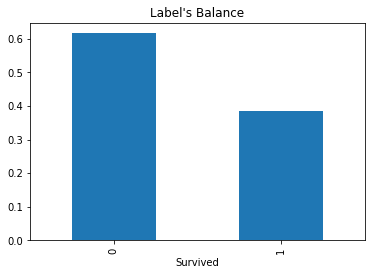

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
print ('survival rate =', titanic.Survived.mean())
(titanic.groupby('Survived').size()/titanic.shape[0]).plot(kind="bar",title="Label's Balance")


In [18]:
# make a function to plot survival against passenger attribute
def survival_rate(column,t):
    df=pd.DataFrame()
    df['total']=titanic.groupby(column).size()
    df['survived'] = titanic.groupby(column).sum()['Survived']
    df['percentage'] = round(df['survived']/df['total']*100,2)
    print(df)

    df['survived'].plot(kind=t)
    df['total'].plot(kind=t,alpha=0.5,title="Survivors per "+str(column))
    plt.show()

        total  survived  percentage
Sex                                
female    314       233       74.20
male      577       109       18.89


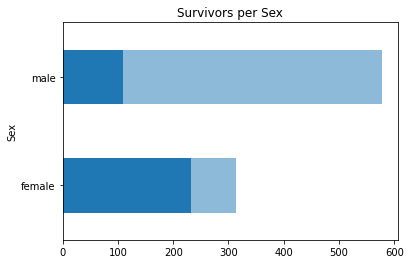

In [19]:
# Draw survival per Sex
survival_rate("Sex","barh")

        total  survived  percentage
Pclass                             
1         216       136       62.96
2         184        87       47.28
3         491       119       24.24


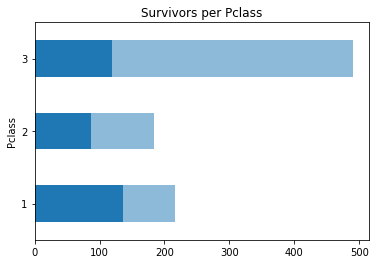

In [20]:
# Draw survival per Class
survival_rate("Pclass","barh")

          total  survived  percentage
Embarked                             
C           168        93       55.36
Q            77        30       38.96
S           646       219       33.90


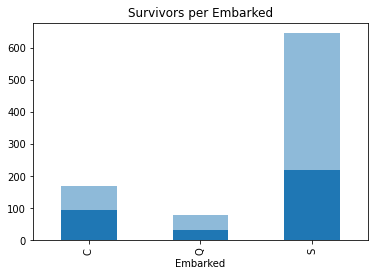

In [21]:
# Graph survived per port of embarkation
survival_rate("Embarked","bar")

       total  survived  percentage
Parch                             
0        678       233       34.37
1        118        65       55.08
2         80        40       50.00
3          5         3       60.00
4          4         0        0.00
5          5         1       20.00
6          1         0        0.00


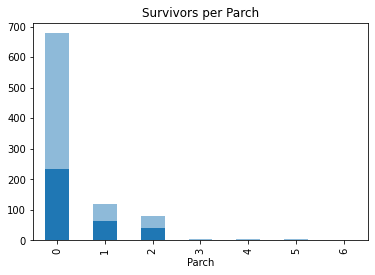

In [24]:
# Draw survived per Number of Parents/Children Aboard (Parch)
# your code here
survival_rate("Parch","bar")

       total  survived  percentage
SibSp                             
0        608       210       34.54
1        209       112       53.59
2         28        13       46.43
3         16         4       25.00
4         18         3       16.67
5          5         0        0.00
8          7         0        0.00


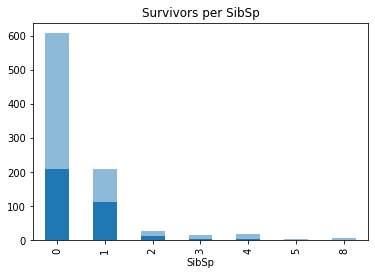

In [25]:
# Draw survived per Number of Siblings/Spouses Aboard (SibSp)
# your code here
survival_rate("SibSp","bar")

## Model training

Some of the columns don't have predictive power, so let's specify which ones are included for prediction

In [26]:
predictors = ["Pclass", "Sex", "Age", 'SibSp' ,'Parch', "Fare", "Embarked"]  

We need now to convert text columns in **predictors** to numerical ones

In [27]:
for col in predictors: # Loop through all columns in predictors
    if titanic[col].dtype == 'object':  # check if column's type is object (text)
        titanic[col] = pd.Categorical(titanic[col]).codes  # convert text to numerical

titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [28]:
# Split the data into a training set and a testing set. Set: test_size=0.3, random_state=1
# your code here
from sklearn.model_selection import train_test_split
y = titanic["Survived"]
x = titanic[predictors]
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1)

print ("train shape", X_train.shape, y_train.shape)
print ("test shape", X_test.shape, y_test.shape)

train shape (623, 7) (623,)
test shape (268, 7) (268,)


In [29]:
# import LogisticRegression from: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# your code here
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=1)
clf.fit(X_train,y_train)
# your code here
train_score = clf.score(X_train,y_train)
test_score = clf.score(X_test,y_test)
print ('train accuracy =', train_score)
print ('test accuracy =', test_score)

train accuracy = 0.8073836276083467
test accuracy = 0.7723880597014925


Let's print the model's parameters

In [30]:
coeff = pd.DataFrame()
coeff['Feature'] = X_train.columns
coeff['Coefficient Estimate'] = pd.Series(clf.coef_[0])
coeff.loc[len(coeff)]=['Intercept',clf.intercept_[0]]
print (coeff)

     Feature  Coefficient Estimate
0     Pclass             -1.158692
1        Sex             -2.708761
2        Age             -0.040634
3      SibSp             -0.334012
4      Parch              0.071940
5       Fare             -0.000570
6   Embarked             -0.223307
7  Intercept              5.391544


We now need to predict class labels for the test set. We will also generate the class probabilities

In [31]:
# predict class labels for the test set
y_pred = clf.predict(X_test)
print (y_pred)

[1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1 0
 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1
 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0
 1 1 0 1 1 0 0 1 0]


In [32]:
# generate class probabilities : http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
y_probs = clf.predict_proba(X_test)
print (y_probs)

[[0.13931142 0.86068858]
 [0.91545695 0.08454305]
 [0.12666421 0.87333579]
 [0.36591835 0.63408165]
 [0.07784295 0.92215705]
 [0.89067947 0.10932053]
 [0.80772592 0.19227408]
 [0.1192279  0.8807721 ]
 [0.49862983 0.50137017]
 [0.44730681 0.55269319]
 [0.9055319  0.0944681 ]
 [0.3994278  0.6005722 ]
 [0.75883966 0.24116034]
 [0.7731844  0.2268156 ]
 [0.36586709 0.63413291]
 [0.51884424 0.48115576]
 [0.92555339 0.07444661]
 [0.92813016 0.07186984]
 [0.93745222 0.06254778]
 [0.23336005 0.76663995]
 [0.92721769 0.07278231]
 [0.89953164 0.10046836]
 [0.03807376 0.96192624]
 [0.70151647 0.29848353]
 [0.27209461 0.72790539]
 [0.91229348 0.08770652]
 [0.06263101 0.93736899]
 [0.28628338 0.71371662]
 [0.75835591 0.24164409]
 [0.0570066  0.9429934 ]
 [0.36148869 0.63851131]
 [0.51940638 0.48059362]
 [0.52697797 0.47302203]
 [0.47141323 0.52858677]
 [0.93503275 0.06496725]
 [0.48609823 0.51390177]
 [0.59876827 0.40123173]
 [0.91543121 0.08456879]
 [0.46440514 0.53559486]
 [0.88665969 0.11334031]


As you can see, the classifier outputs two probabilities for each row. It's predicting a 1 (Survived) any time the probability in the second column is greater than 0.5. Let's visualize it all together.

In [33]:
pred = pd.DataFrame({        
        "Survived_original": y_test,
        "Survived_predicted": y_pred,
        "Survived_proba": np.transpose(y_probs)[1]      
        })
pred["Comparison"]= pred.Survived_original ==pred.Survived_predicted
pred.head()

,Survived_original,Survived_predicted,Survived_proba,Comparison
PassengerId,,,,
863,1,1,0.860689,True
224,0,0,0.084543,True
85,1,1,0.873336,True
681,0,1,0.634082,False
536,1,1,0.922157,True


## Confusion matrix

In [34]:
from sklearn import metrics
print (metrics.confusion_matrix(y_test, y_pred))
print (metrics.classification_report(y_test, y_pred))

[[129  24]
 [ 37  78]]
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       153
           1       0.76      0.68      0.72       115

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



As you can see, we can have the classification report for each class

## K-Fold Cross Validation

In [35]:
# import cross_validation from: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
# your code here
from sklearn.model_selection import cross_val_score
clf = LogisticRegression(random_state=1)
scores = cross_val_score(clf, titanic[predictors], titanic["Survived"], scoring='accuracy', cv=5)
## see model 
print(scores)
# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

[0.7877095  0.78651685 0.78089888 0.76966292 0.82022472]
0.7890025735986442


When you are improving a model, you want to make sur that you are really doing it and not just being lucky. This is why it's good to work with cross validation instead of one train/test split.